In [1]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('data1.csv')

In [3]:
df.head()

,X,Y,Class
0,5.5,7.0,1
1,9.4,13.0,1
2,6.0,6.8,1
3,12.5,13.0,0
4,5.5,5.6,1


In [10]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
labels = df['Class'].to_numpy()

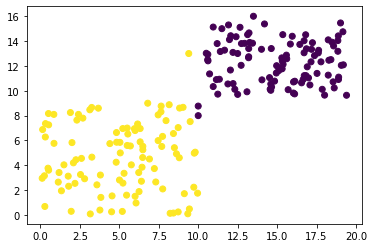

In [5]:
plt.scatter(x, y, c=labels)

In [11]:
# Reshape the array to a 2D array
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(x)
x_normal = scaler.transform(x)
scaler.fit(y)
y_normal = scaler.transform(y)

x_normal = np.ravel(x_normal)
y_normal = np.ravel(y_normal)

In [12]:
x_normal.shape

(212,)

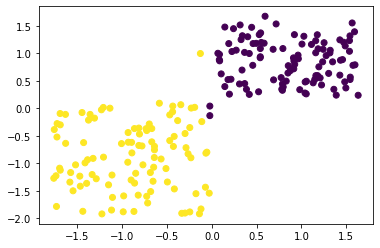

In [13]:
plt.scatter(x_normal, y_normal, c=labels)

In [51]:
df_norm = pd.DataFrame({
  'X' : x_normal,
  'Y' : y_normal
})
final_inp = np.array([df_norm['X'], df_norm['Y']])

In [37]:
final_inp.shape

(2, 212)

In [56]:
fpc_s = []
u_s = []
cntr_s = []
for i in range(2,11):
  num_clusters = i
  cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(final_inp, num_clusters, 2, error=0.005, maxiter=1000, init=None)
  fpc_s.append(fpc)
  u_s.append(u)
  cntr_s.append(cntr)

In [57]:
max_ind = np.argmax(np.array(fpc_s))
best_num_cluster = 2 + max_ind
best_fpc = fpc_s[max_ind]
print(f"best fpc is {best_fpc} which belongs to number of clusters equal to {best_num_cluster}")

best fpc is 0.8687990750112378 which belongs to number of clusters equal to 2


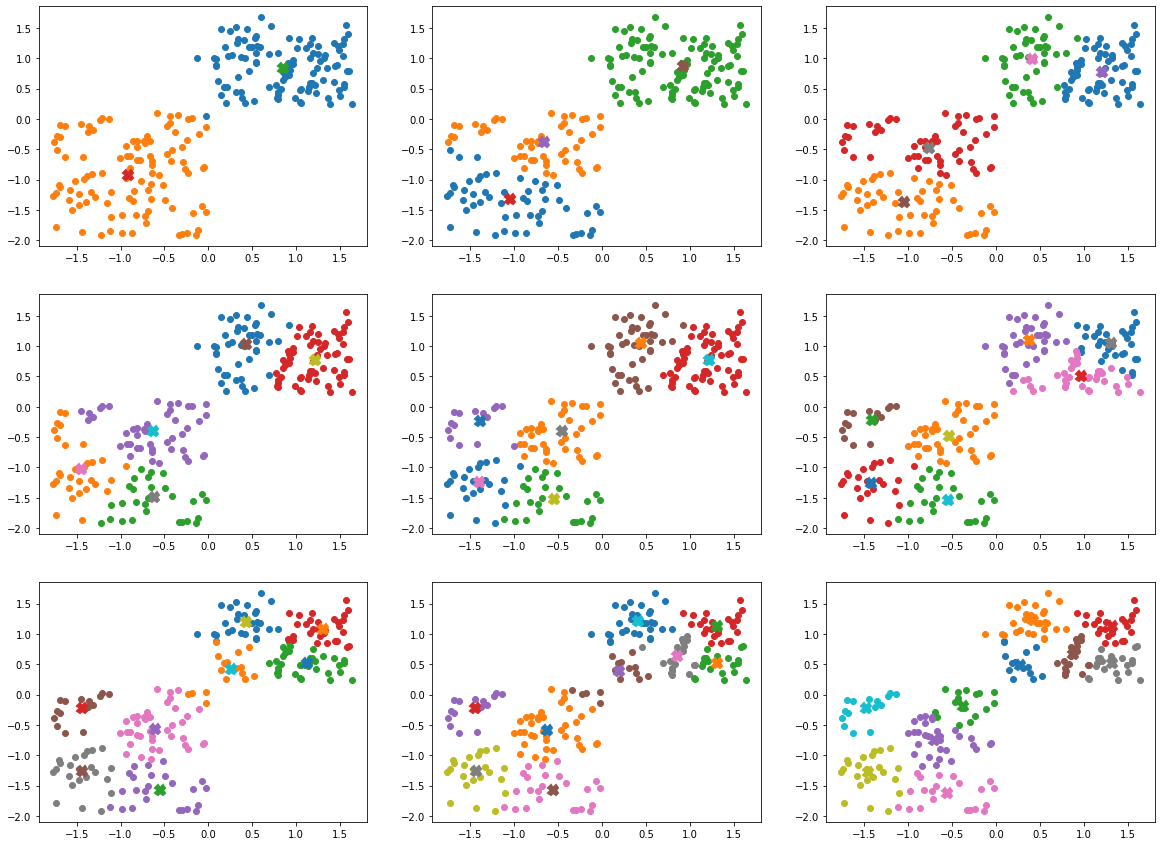

In [65]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for ind, u in enumerate(u_s):
    num_clusters = ind + 2
    cluster_membership = np.argmax(u, axis=0)
    for i in range(num_clusters):
        axs[ind//3,ind%3].plot(x_normal[cluster_membership == i], y_normal[cluster_membership == i], 'o', label=f'Cluster {i + 1}')
for ind, cntr in enumerate(cntr_s):
    for cluster_center in cntr:
        axs[ind//3,ind%3].plot(cluster_center[0], cluster_center[1], 'X', markersize=10, markeredgewidth=2, label='Cluster Center')

plt.show()